<a href="https://colab.research.google.com/github/Annoor-94/DS-ML/blob/main/Machine_Learning_Beginner(Magic_Data_set).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names= cols)
df.head()



In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color= 'blue',label= 'gamma', alpha=0.7, density= True)
  plt.hist(df[df['class']==0][label], color= 'red',label= 'hydron', alpha=0.7, density= True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, Validation, Test Datasets




we will split the dataset and then do random sampling with shuffling. Splitting the data 60% for training, 60-80% for validation and 80-100% for testing


Generates a random sample from a given 1-D numpy array. If frac > 1, replacement should be set to True .The fraction of rows and columns to be selected can be specified in the frac parameter. frac=1 means 100%
The frac parameter enables you to specify the fraction of items to return in the sample. The argument to this parameter should be a floating point number. So for example, if you set frac = . 5 , then the sample() method will return 50% of the rows from the dataframe.


In [ ]:
train, valid, test= np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df) )])

In [ ]:
def scale_dataset(dataframe, oversample= False):
  X= dataframe[dataframe.columns[:-1]].values #taking values up to last from the column
  y= dataframe[dataframe.columns[-1]].values #its the last column. I can just index it into that last column

  scaler = StandardScaler()
  X= scaler.fit_transform(X)
  if oversample:
    ros= RandomOverSampler()
    X, y= ros.fit_resample(X,y)

  data= np.hstack((X, np.reshape(y,(-1,1))))
  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)


the purpose of validation and test is to know if i have the data i haven't seen yet. how does my sample perform on these?I dont want to oversample that right now. Without caring about balancing I want to know if I have a random set of unlabeled data. Can I trust my model? That's Why I'm not oversampling.  

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model= KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use **Euclidean distance** for determining the proximity between neighboring points. Using our newly trained model, we predict whether a tumor is benign or not given its mean compactness and area.

In [ ]:
y_pred= knn_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
y_test

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_pred, y_test))

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred= nb_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.39      0.67      0.50       787
           1       0.90      0.73      0.80      3017

    accuracy                           0.72      3804
   macro avg       0.64      0.70      0.65      3804
weighted avg       0.79      0.72      0.74      3804



**Log Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred= lg_model.predict(X_test)
print(classification_report(y_pred, y_test))

**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model= SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_pred, y_test))

**Neural Network**

In [ ]:
import tensorflow as tf


In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation= 'relu', input_shape= (10, )),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dropout(dropout_prob),

    tf.keras.layers.Dense(1, activation= 'sigmoid'),
])

    nn_model.compile(optimizer= tf.keras.optimizers.Adam(lr), loss= 'binary_crossentropy', metrics= ['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


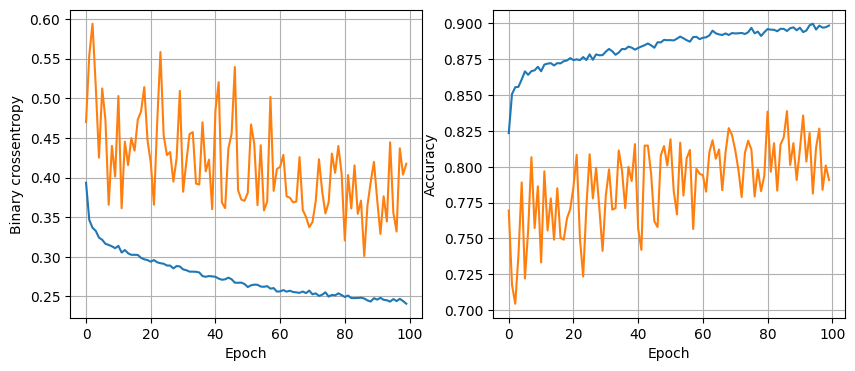

16 nodes, dropout 0, lr 0.01, batch size 64


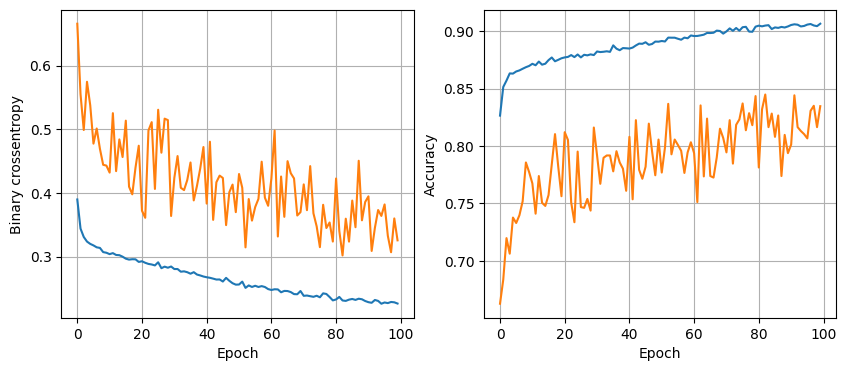

16 nodes, dropout 0, lr 0.01, batch size 128


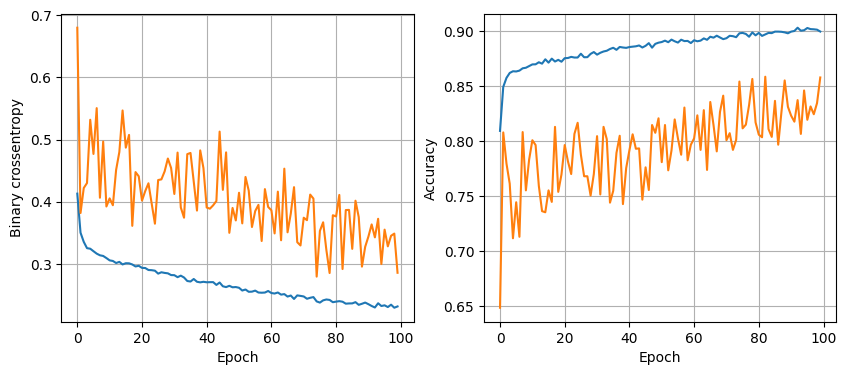

16 nodes, dropout 0, lr 0.005, batch size 32


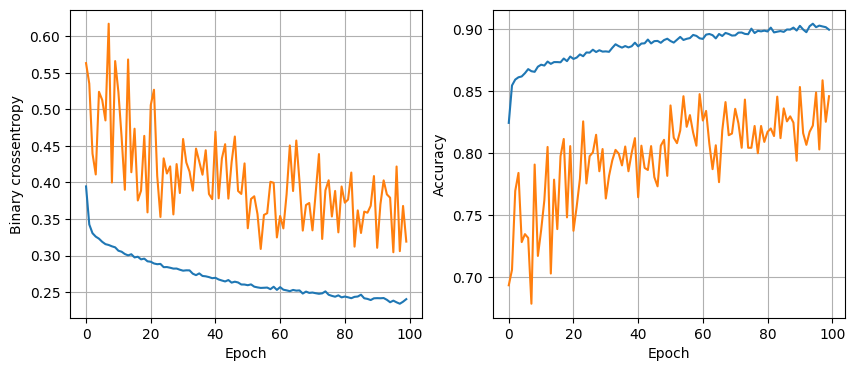

16 nodes, dropout 0, lr 0.005, batch size 64


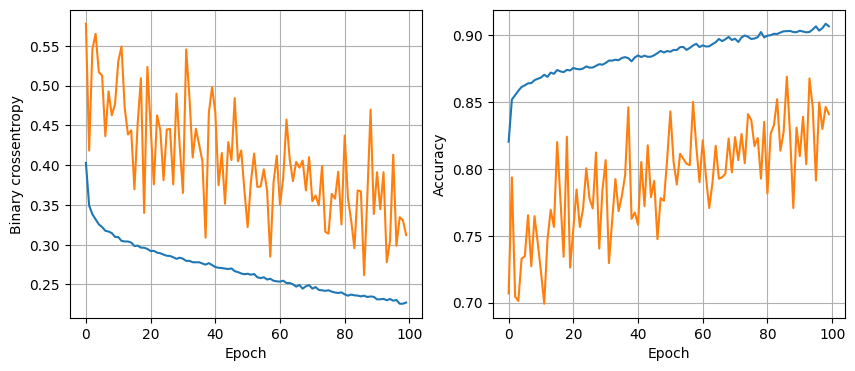

16 nodes, dropout 0, lr 0.005, batch size 128


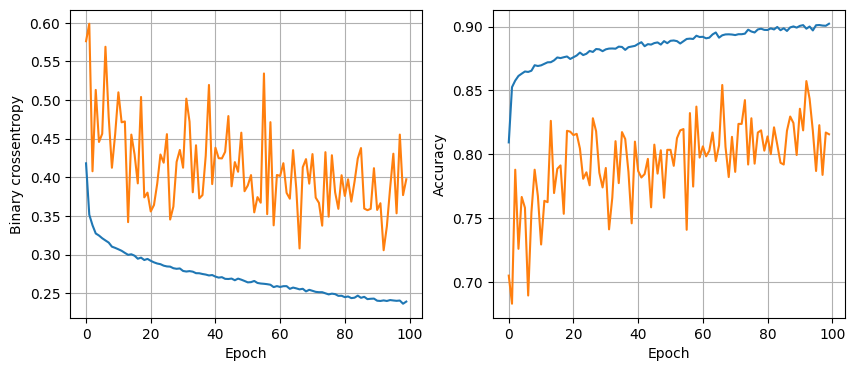

16 nodes, dropout 0, lr 0.001, batch size 32


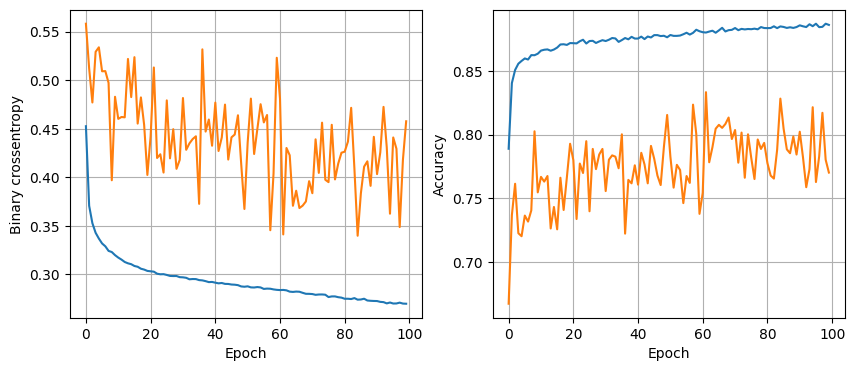

16 nodes, dropout 0, lr 0.001, batch size 64


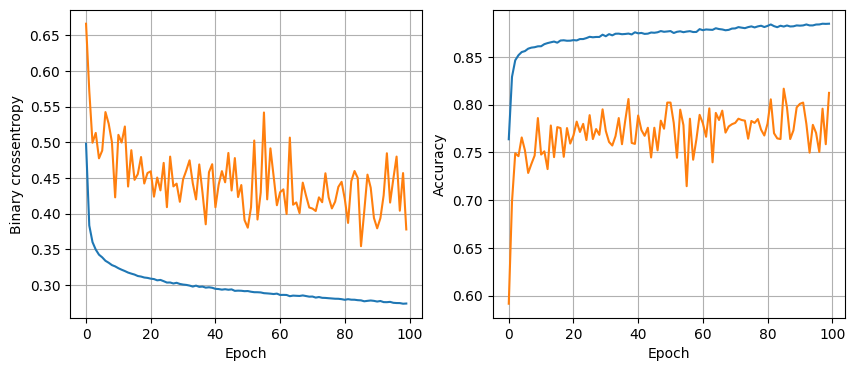

16 nodes, dropout 0, lr 0.001, batch size 128


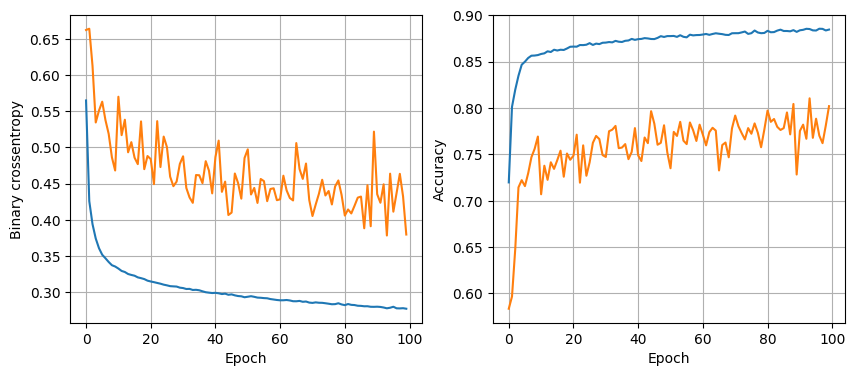

16 nodes, dropout 0.2, lr 0.01, batch size 32


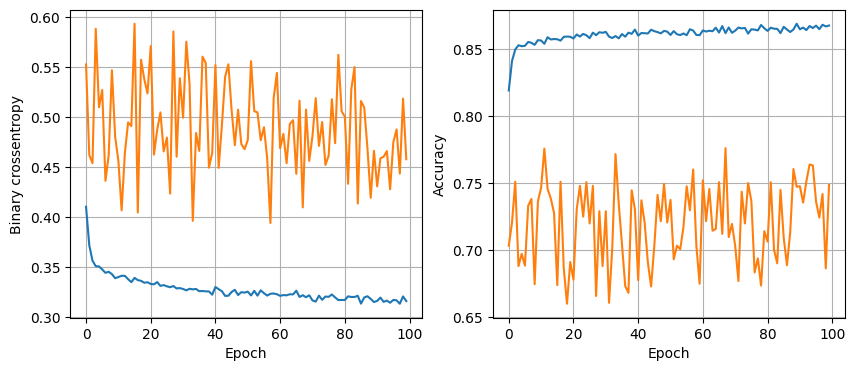

16 nodes, dropout 0.2, lr 0.01, batch size 64


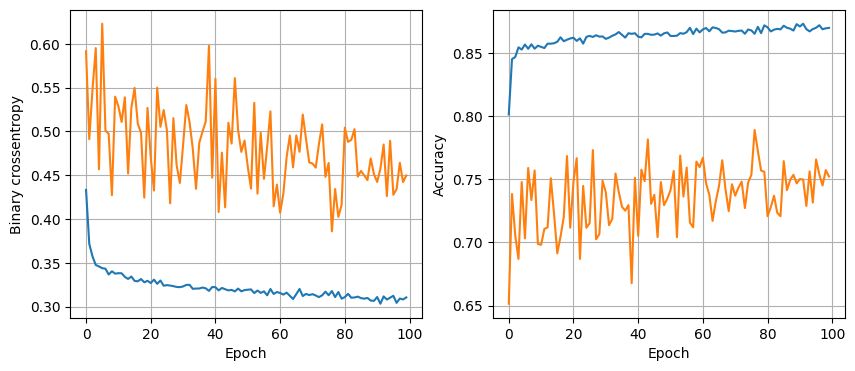

16 nodes, dropout 0.2, lr 0.01, batch size 128


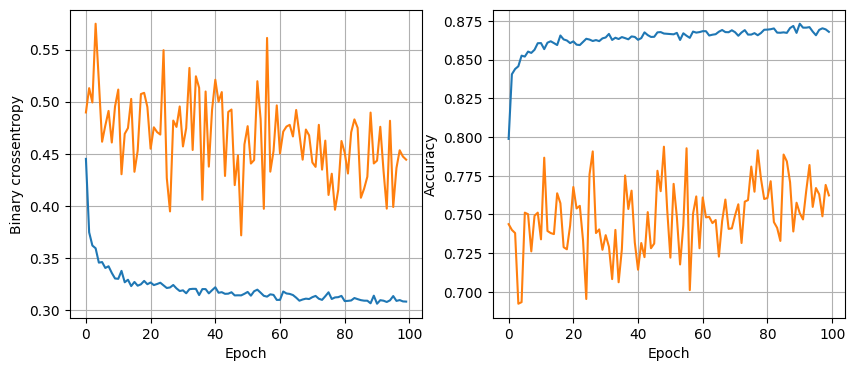

16 nodes, dropout 0.2, lr 0.005, batch size 32


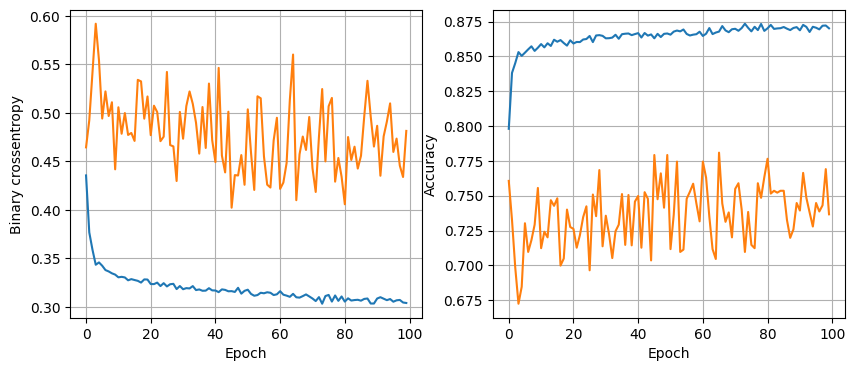

16 nodes, dropout 0.2, lr 0.005, batch size 64


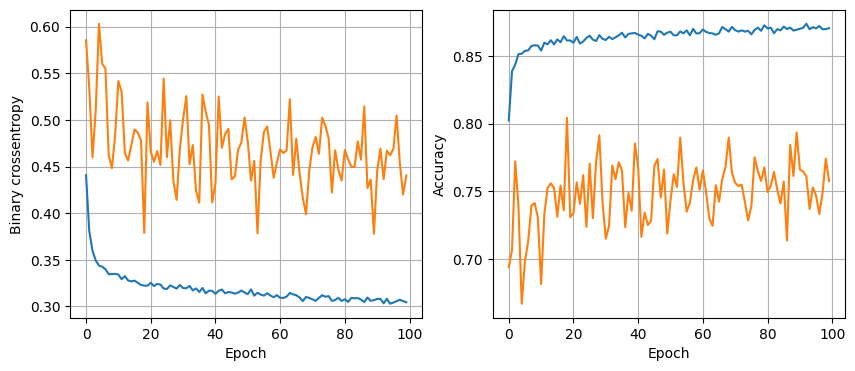

16 nodes, dropout 0.2, lr 0.005, batch size 128


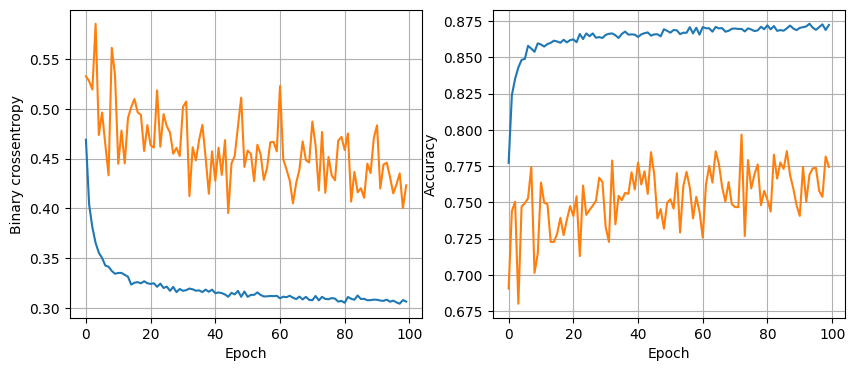

16 nodes, dropout 0.2, lr 0.001, batch size 32


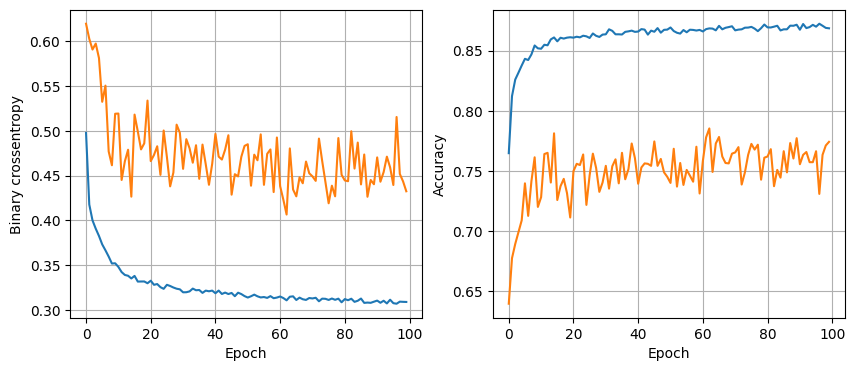

16 nodes, dropout 0.2, lr 0.001, batch size 64


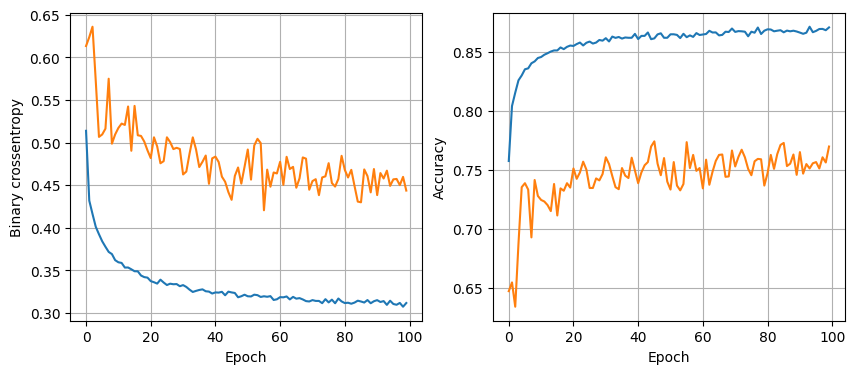

16 nodes, dropout 0.2, lr 0.001, batch size 128


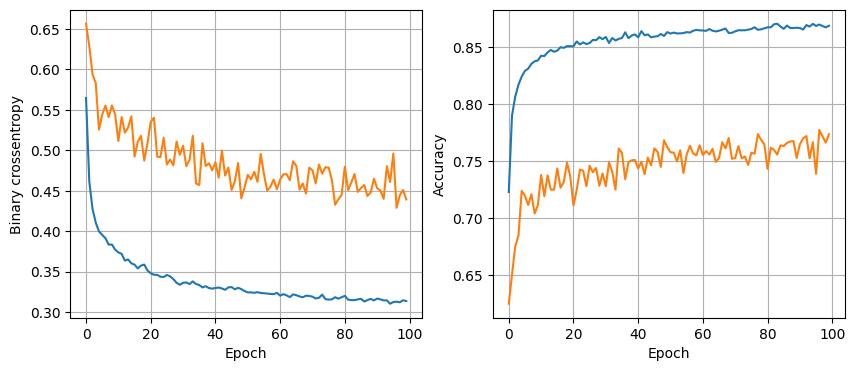

32 nodes, dropout 0, lr 0.01, batch size 32


KeyboardInterrupt: ignored

In [ ]:
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)